# get list of files in gutenberg

In [2]:
import glob
import nltk
#get the filelist using glob 
file_list = glob.glob(r'C:\Users\Hemshree\AppData\Roaming\nltk_data\corpora\gutenberg\*.txt')


In [13]:
#file_list #display filelist

# Get words and sort them according to their frequency

In [11]:
import re
frequency = {} #initialise dictionary of word, frequency
word = []      #initialise list of words


    
#get words 
for file in file_list:
    with open(file,'r') as a: # Use file to refer to the file object
        data = a.read()
        text_string = data.lower()
        match_pattern =  re.findall(r'\b[a-z]{3,15}\b', text_string) #match pattern of re to eliminate punctuations and numbers
    for word in match_pattern:
        if word.isalpha(): #word is alpha check
            if word not in frequency:
                frequency[word] = 1  #checking if the word is available in the dictionary
            else:
                frequency[word] += 1 # for existing words, increment by 1


# sort words with respect to frequency

In [12]:
def sorted_words():        #function to sort the words according to frequency        
    return sorted(frequency.items(), key=lambda x: x[1], reverse=True)  # sort the words using lambda
sorted_words()

[('the', 133583),
 ('and', 95442),
 ('that', 28798),
 ('his', 21402),
 ('for', 19527),
 ('was', 18715),
 ('with', 17599),
 ('not', 17373),
 ('you', 16398),
 ('but', 13944),
 ('all', 13725),
 ('they', 13104),
 ('him', 13012),
 ('shall', 11682),
 ('her', 11552),
 ('had', 10317),
 ('them', 10245),
 ('have', 10116),
 ('said', 9429),
 ('she', 9078),
 ('from', 9076),
 ('unto', 9010),
 ('this', 8915),
 ('which', 8775),
 ('lord', 8590),
 ('their', 7806),
 ('will', 7368),
 ('were', 6871),
 ('are', 6854),
 ('thou', 6759),
 ('there', 6380),
 ('when', 6330),
 ('one', 6218),
 ('what', 5792),
 ('out', 5771),
 ('man', 5615),
 ('thy', 5609),
 ('god', 5287),
 ('your', 5121),
 ('then', 5091),
 ('thee', 4807),
 ('now', 4677),
 ('upon', 4587),
 ('who', 4262),
 ('into', 4098),
 ('more', 4062),
 ('would', 4046),
 ('very', 4009),
 ('come', 3642),
 ('could', 3594),
 ('like', 3468),
 ('before', 3449),
 ('been', 3410),
 ('any', 3357),
 ('came', 3337),
 ('day', 3326),
 ('king', 3149),
 ('did', 3121),
 ('little',

# import the data to csv file

In [7]:
#make a csv file and import data to csv file
import csv
with open('Data.csv', 'w',newline="") as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Word','Freq','Rank']) #add header as word, freq and rank for the data to be imported in csv
    n=1
    for x in sorted_words: #for loop to insert data in the file and print rank  
        csv_out.writerow([x[0], x[1], n])
        n +=1
        

# plot the rank/frequency log-log graph from csv file

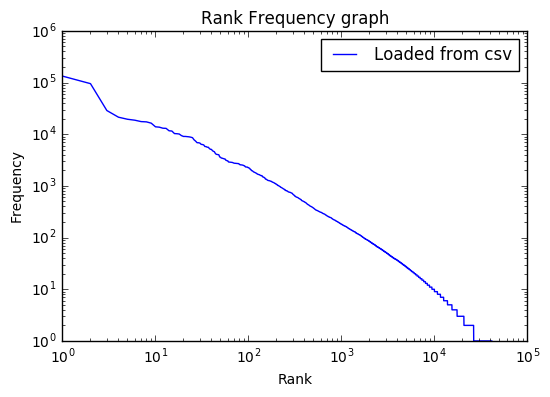

In [6]:
import matplotlib.pyplot as plt
import csv

x = []
y = []

with open('Data.csv','r') as csvfile:
    csvreader = csv.reader(csvfile)

    # This skips the first row of the CSV file.
    # csvreader.next() also works in Python 2.
    next(csvreader)


    #plots = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        x.append(int(row[2]))
        y.append(int(row[1]))

plt.loglog(x,y, label='Loaded from csv')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Rank Frequency graph')
plt.legend()
plt.show()




# rank frequency graph indicates that the 20% of words in gutenberg corpus approximately contributes to 80% of the words in it. The zipf's law is proved. 